# <center>HOUSING RENT PREDICTION FOR DELHI

![image](https://www.luxuryresidences.in/seo-assest/images/dlf-one-midtown.webp)

### Content:

Given dataset contains features of housing properties listed for renting purpose . Dataset has 5000 rows and 16 columns. Here we are going to analyse the factors,which are affecting the price of the house/flat.   

### Context:



Delhi, the bustling capital of India, stands as a dynamic hub where tradition and modernity converge. Among its myriad facets, the realm of rented housing properties holds significant prominence. With a population characterized by diversity and mobility, the demand for rental accommodations in Delhi remains robust. From the historic alleys of Old Delhi to the gleaming high-rises of the New Delhi region, the city offers a wide spectrum of rental options to cater to the varied needs and preferences of its inhabitants. Whether it's the vibrant markets of Connaught Place, the serene neighborhoods of South Delhi, or the burgeoning suburbs of East Delhi, each locality paints a distinct picture of the city's rental landscape. However, alongside the abundance of choices, challenges such as affordability, infrastructure, and regulatory frameworks shape the narrative of rented housing in Delhi. As stakeholders navigate through this dynamic ecosystem, understanding the nuances of the rental market becomes paramount, reflecting the ever-evolving tapestry of life in India's capital city.

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#library for  and cross validation
from sklearn.model_selection import cross_val_score

#Standardize features
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

#library for splitting data into train and test
from sklearn.model_selection import train_test_split

#import algorithms to use
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Indian_housing_Delhi_data.csv')

In [3]:
df

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,110",Unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [5]:
df.isnull().sum()

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          25
numBalconies        2263
isNegotiable        4821
priceSqFt           5000
verificationDate       0
description          285
SecurityDeposit        0
Status                 0
dtype: int64

In [6]:
df.drop(['isNegotiable','priceSqFt','numBalconies'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

house_type            0
house_size            0
location              0
city                  0
latitude              0
longitude             0
price                 0
currency              0
numBathrooms         25
verificationDate      0
description         285
SecurityDeposit       0
Status                0
dtype: int64

In [8]:
df.dropna()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,INR,3.0,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,110",Unfurnished


In [9]:
df.isnull().sum()

house_type            0
house_size            0
location              0
city                  0
latitude              0
longitude             0
price                 0
currency              0
numBathrooms         25
verificationDate      0
description         285
SecurityDeposit       0
Status                0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [11]:
df.duplicated().sum()

467

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

house_type            0
house_size            0
location              0
city                  0
latitude              0
longitude             0
price                 0
currency              0
numBathrooms         25
verificationDate      0
description         257
SecurityDeposit       0
Status                0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

house_type          0
house_size          0
location            0
city                0
latitude            0
longitude           0
price               0
currency            0
numBathrooms        0
verificationDate    0
description         0
SecurityDeposit     0
Status              0
dtype: int64

In [17]:
df.price.max()

3010101

In [18]:
df.price.min()

3000

In [19]:
df['location'].unique()

array(['Kalkaji', 'Mansarover Garden', 'Uttam Nagar', 'Model Town',
       'Sector 13 Rohini', 'DLF Farms', 'laxmi nagar', 'Swasthya Vihar',
       'Janakpuri', 'Pitampura', 'Gagan Vihar', 'Dabri',
       'Govindpuri Extension', 'Paschim Vihar', 'Vijay Nagar',
       'Vasant Kunj', 'Safdarjung Enclave', 'Hauz Khas', 'Bali Nagar',
       'Rajouri Garden', 'Shalimar Bagh', 'Green Park',
       'Dr Mukherji Nagar', 'Subhash Nagar', 'DLF Phase 5', 'Patel Nagar',
       'Jasola', 'Dwarka Mor', 'Kaushambi', 'Surajmal Vihar',
       'Sector 4 Dwarka', 'Sector 6 Dwarka', 'Sector 14 Dwarka',
       'Sarvodaya Enclave', 'Chattarpur', 'Ramesh Nagar',
       'Mayur Vihar II', 'Naraina', 'Greater Kailash',
       'Chittaranjan Park', 'Sector 19 Dwarka', 'Sector 23 Dwarka',
       'Lajpat Nagar III', 'South Extension 2', 'Sector-18 Dwarka',
       'Mansa Ram Park', 'Gautam Nagar', 'Sector 22 Dwarka',
       'Sheikh Sarai', 'Govindpuri', 'Sector 13 Dwarka', 'Shanti Niketan',
       'Defence Colony', 

In [20]:
len(df['location'].unique())

252

In [21]:
df.groupby(['price'])[['numBathrooms','house_type']].sum()

,numBathrooms,house_type
price,,
3000,1.0,1 RK Studio Apartment
3500,1.0,1 BHK Apartment
3600,1.0,1 BHK Apartment
4000,4.0,1 BHK Apartment 3 BHK Apartment
4500,1.0,1 BHK Independent House
...,...,...
2162295,4.0,4 BHK Villa
2162955,4.0,5 BHK Independent House
2236212,4.0,4 BHK Villa


In [22]:
df["price_range"] = pd.cut(df.price, bins=4, labels=("low", "middle", "high",'very_high'))
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status,price_range
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,low
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,low
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,low
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,low
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,low


In [23]:
df["size_range"] = pd.cut(df.price, bins=4, labels=("small", "medium", "large",'very_large'))
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status,price_range,size_range
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,low,small
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,low,small
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,low,small
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,low,small
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,low,small


In [24]:
threshold=300000
x=(df['price']>=threshold).sum()
x.sum()

1692

In [25]:
df.price.mean()

222228.62488240827

In [26]:
df.price.min()

3000

In [27]:
df.price.max()

3010101

In [28]:
max_price_index = df['price'].idxmax()

row_with_max_price = df.loc[max_price_index]

print("Details of the row with maximum price:")
print(row_with_max_price)

Details of the row with maximum price:
house_type                                  12 BHK Independent House 
house_size                                               14,521 sq ft
location                                         Amrita Shergill Marg
city                                                            Delhi
latitude                                                    28.596968
longitude                                                   77.220383
price                                                         3010101
currency                                                          INR
numBathrooms                                                      4.0
verificationDate                                    Posted a year ago
description         Well designed 12 bhk independent house is avai...
SecurityDeposit                                           1,14,01,010
Status                                                    Unfurnished
price_range                                        

Inference:

Maximum rent is given to a housing unit of 12 BHK Independent House located in Amrita Shergill Marg. A security deposit of Rs 1,14,01,010 was asked which is close to the cost of a fairly large residental unit in rural areas in the country.Interestingly bathrooms are only 4. ie all bedrooms are not attatched  

In [29]:
min_price_index = df['price'].idxmin()

row_with_min_price = df.loc[min_price_index]

print("Details of the row with maximum price:")
print(row_with_min_price)

Details of the row with maximum price:
house_type                                     1 RK Studio Apartment 
house_size                                                  270 sq ft
location                                                  Uttam Nagar
city                                                            Delhi
latitude                                                    28.620626
longitude                                                   77.052277
price                                                            3000
currency                                                          INR
numBathrooms                                                      1.0
verificationDate                                   Posted 12 days ago
description         A spacious 1 rk builder floor is available for...
SecurityDeposit                                            No Deposit
Status                                                 Semi-Furnished
price_range                                        

Minimum rent listed is Rs 3000 which is very low considering,it is in a metropolitan city

In [30]:
df['price'].mode()

0    301012
Name: price, dtype: int64

This is the most common price of a rented flat/house in Delhi

In [31]:
price_mode_counts = df['price'].value_counts()

print("Counts of each mode in the 'price' column:")
print(price_mode_counts)

Counts of each mode in the 'price' column:
price
301012     301
301022     147
401012     140
35000      102
20000      101
          ... 
354915       1
322299       1
1501012      1
1549118      1
1549181      1
Name: count, Length: 679, dtype: int64


There are almost 500 houses with in th range of 3 lakhs-4 lakhs

In [32]:
x=df.groupby(['price_range'])['house_type'].sum()
x

price_range
low          1 RK Studio Apartment 1 RK Studio Apartment 2 ...
middle       8 BHK Independent Floor 8 BHK Independent Floo...
high         4 BHK Independent House 5 BHK Independent Hous...
very_high                5 BHK Villa 12 BHK Independent House 
Name: house_type, dtype: object

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,4252.0,28.574892,0.204228,20.011379,28.545759,28.568350,28.618437,2.880547e+01
longitude,4252.0,77.173892,0.122613,72.771332,77.135811,77.197845,77.229736,8.036131e+01
price,4252.0,222228.624882,270529.308014,3000.000000,30000.000000,140000.000000,301102.000000,3.010101e+06
numBathrooms,4252.0,2.927328,1.082413,1.000000,2.000000,3.000000,4.000000,9.000000e+00


From this we can deduce that:
   
    
    minimum rent of a housing unit is 3000 rupees and maximum rent is 3010101 rupees and a rent of 222228.62 rupees needs to be paid on an average.Bathroom available varies from 1 to 9 with an average close to 3 that means areas in consideration are open-defecation-free.

### Visualization:

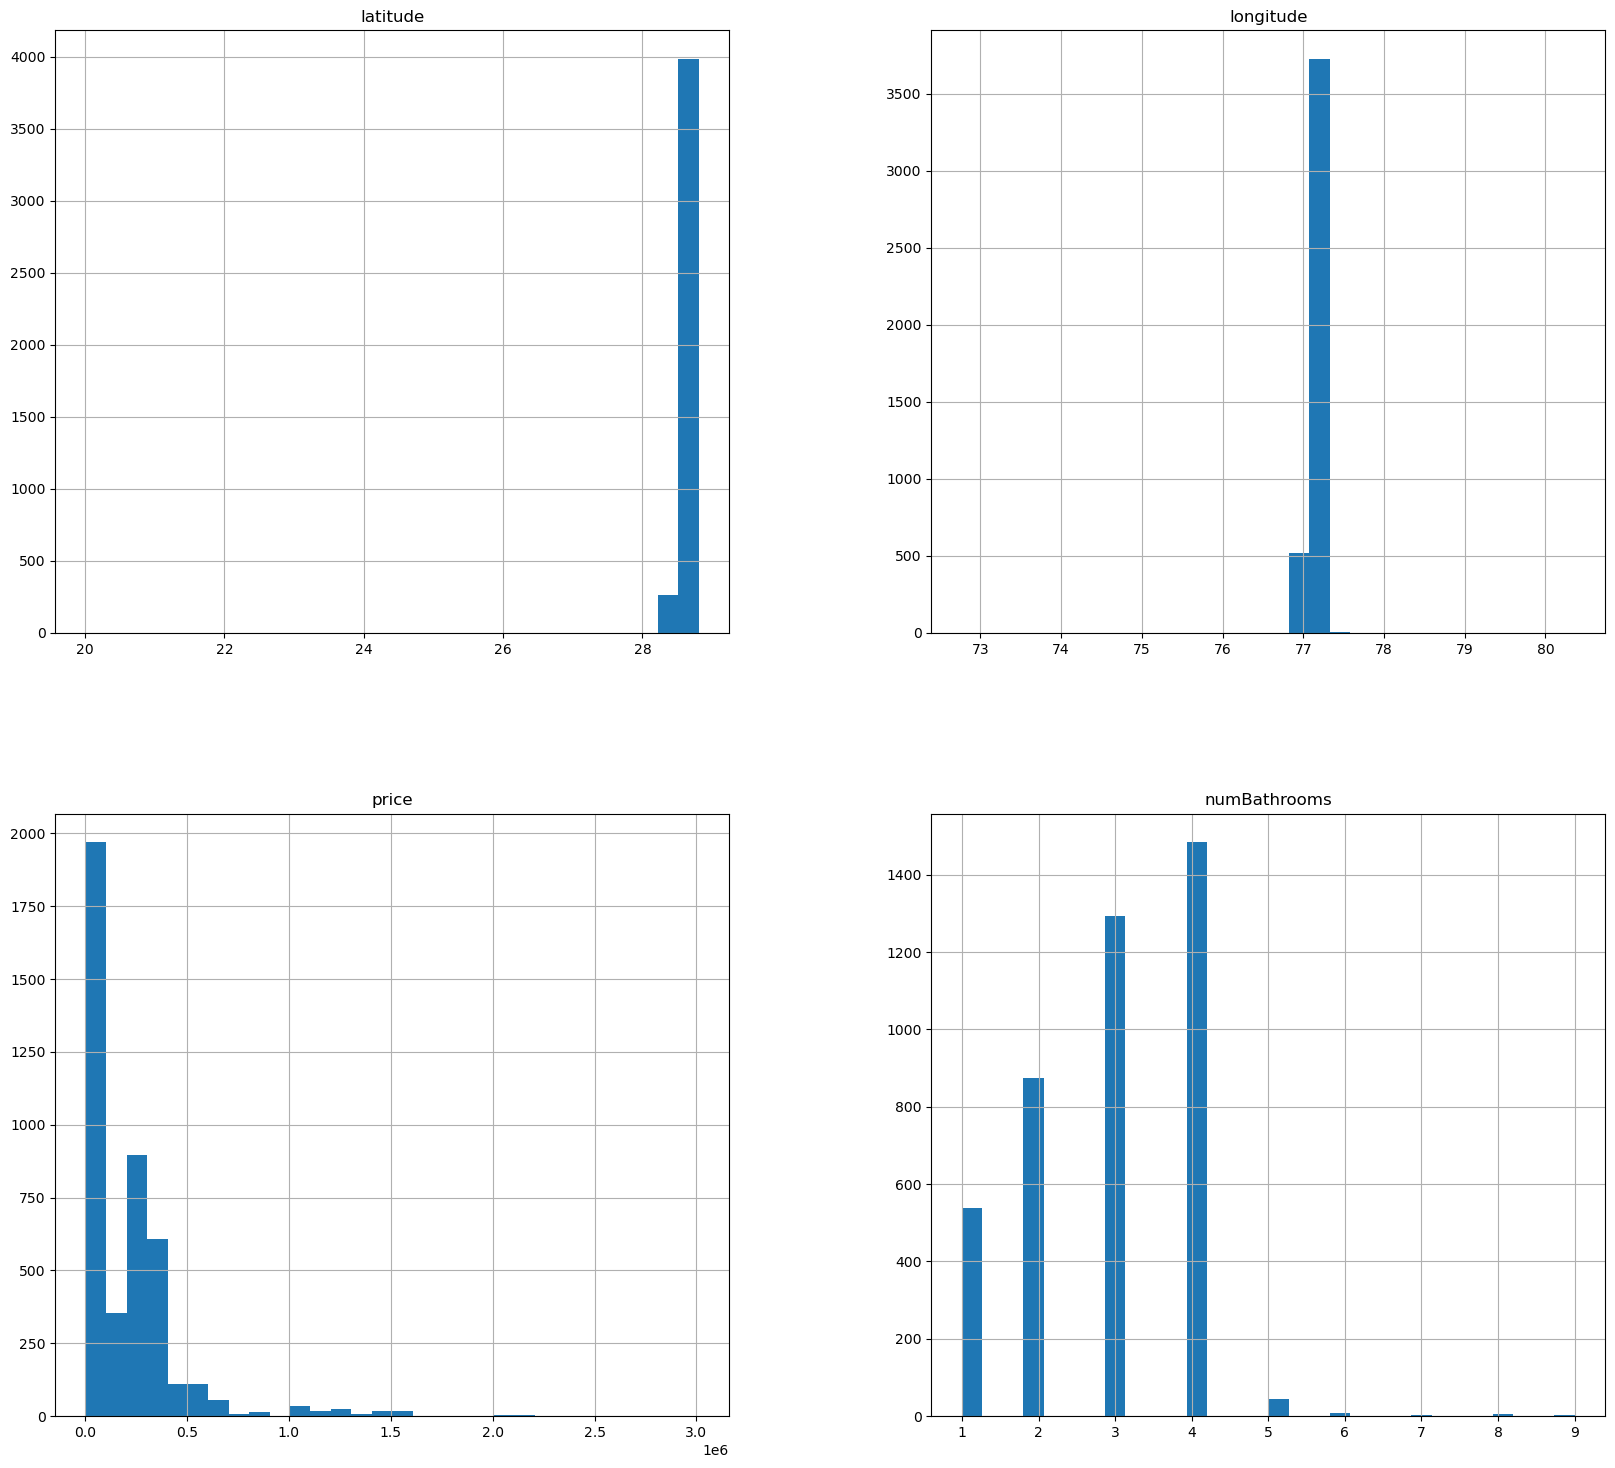

In [34]:

df.hist(bins=30, figsize=(20, 18))
plt.show()

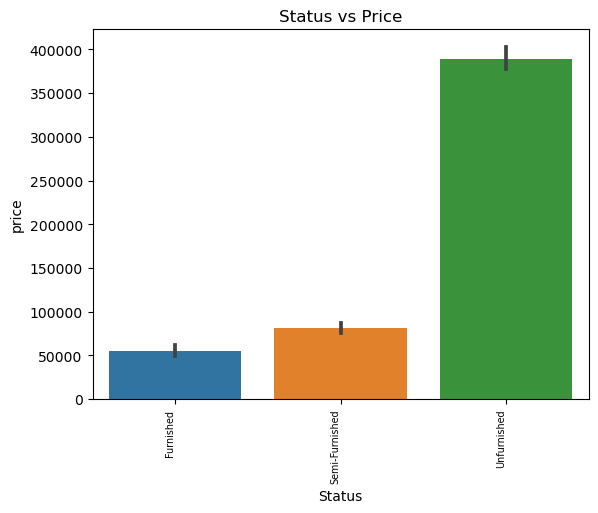

In [35]:
k=sns.barplot(x=df.Status,y=df.price)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Status vs Price')
plt.show()

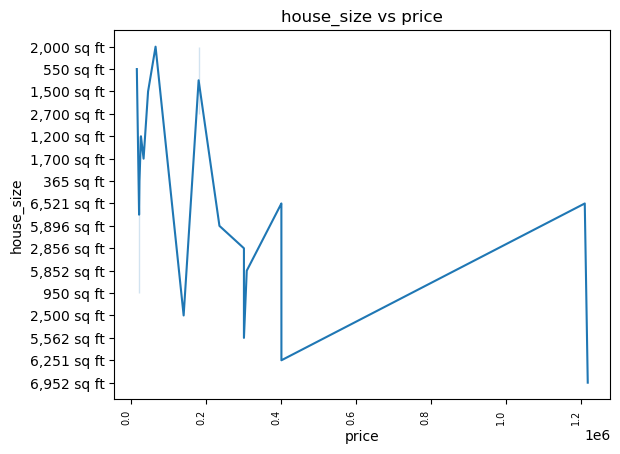

In [36]:

k=sns.lineplot(x=df.price,y=df.house_size[300:14000:200])
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('house_size vs price')
plt.show()

On the contrary to popular belief , house_size is not the only factor affecting the price..

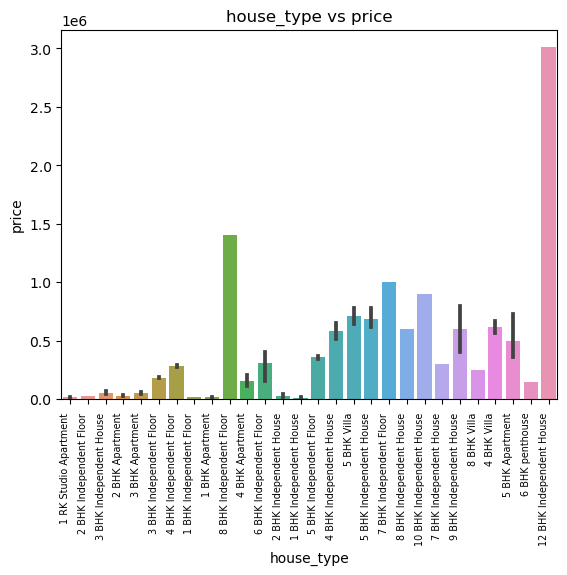

In [37]:
k=sns.barplot(x=df.house_type,y=df.price)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('house_type vs price')
plt.show()

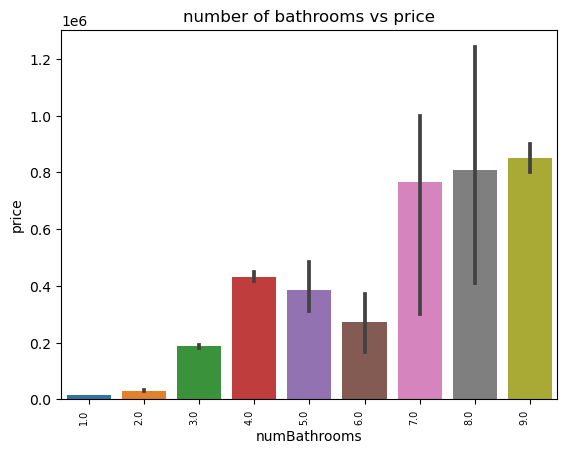

In [38]:
k=sns.barplot(x=df.numBathrooms,y=df.price)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('number of bathrooms vs price')
plt.show()

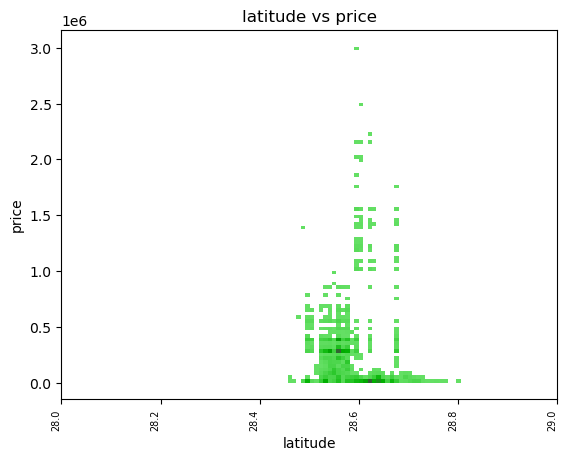

In [39]:
plt.xlim(28,29)
k=sns.histplot(y=df.price,x=df.latitude,color='green')
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('latitude vs price')
plt.show()

Prices are typically high near 28.6 lattitude and it reduces as we move towards both sides, forming an almost symmetric distribution.


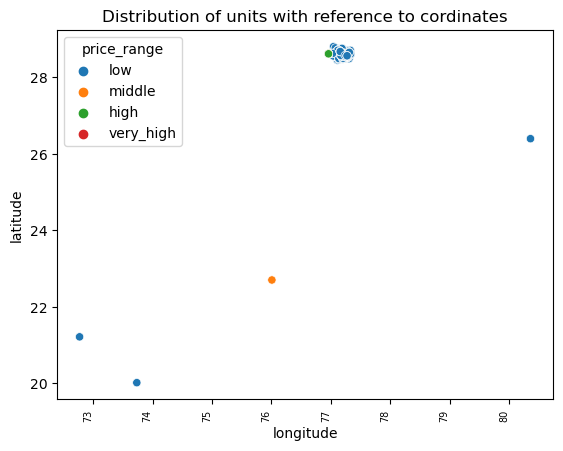

In [40]:

k=sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.price_range)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Distribution of units with reference to cordinates')
plt.show()

From the above scatterplot we can see that, most of the housing units are concentrated near a particular area. and houses/flats there have a range of rates

In [41]:
df["size_range"] = pd.cut(df.price, bins=4, labels=("small", "medium", "large",'very_large'))
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status,price_range,size_range
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,low,small
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,low,small
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,low,small
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,low,small
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,low,small


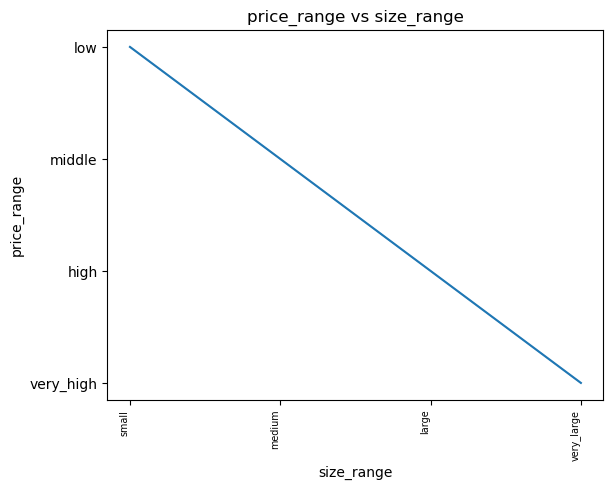

In [42]:
k=sns.lineplot(y=df.price_range,x=df.size_range)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('price_range vs size_range')
plt.show()

If we consider a range of price and size,we will get a straight line graph, ie they are highly related.

Text(0.5, 1.0, 'Rent of different location')

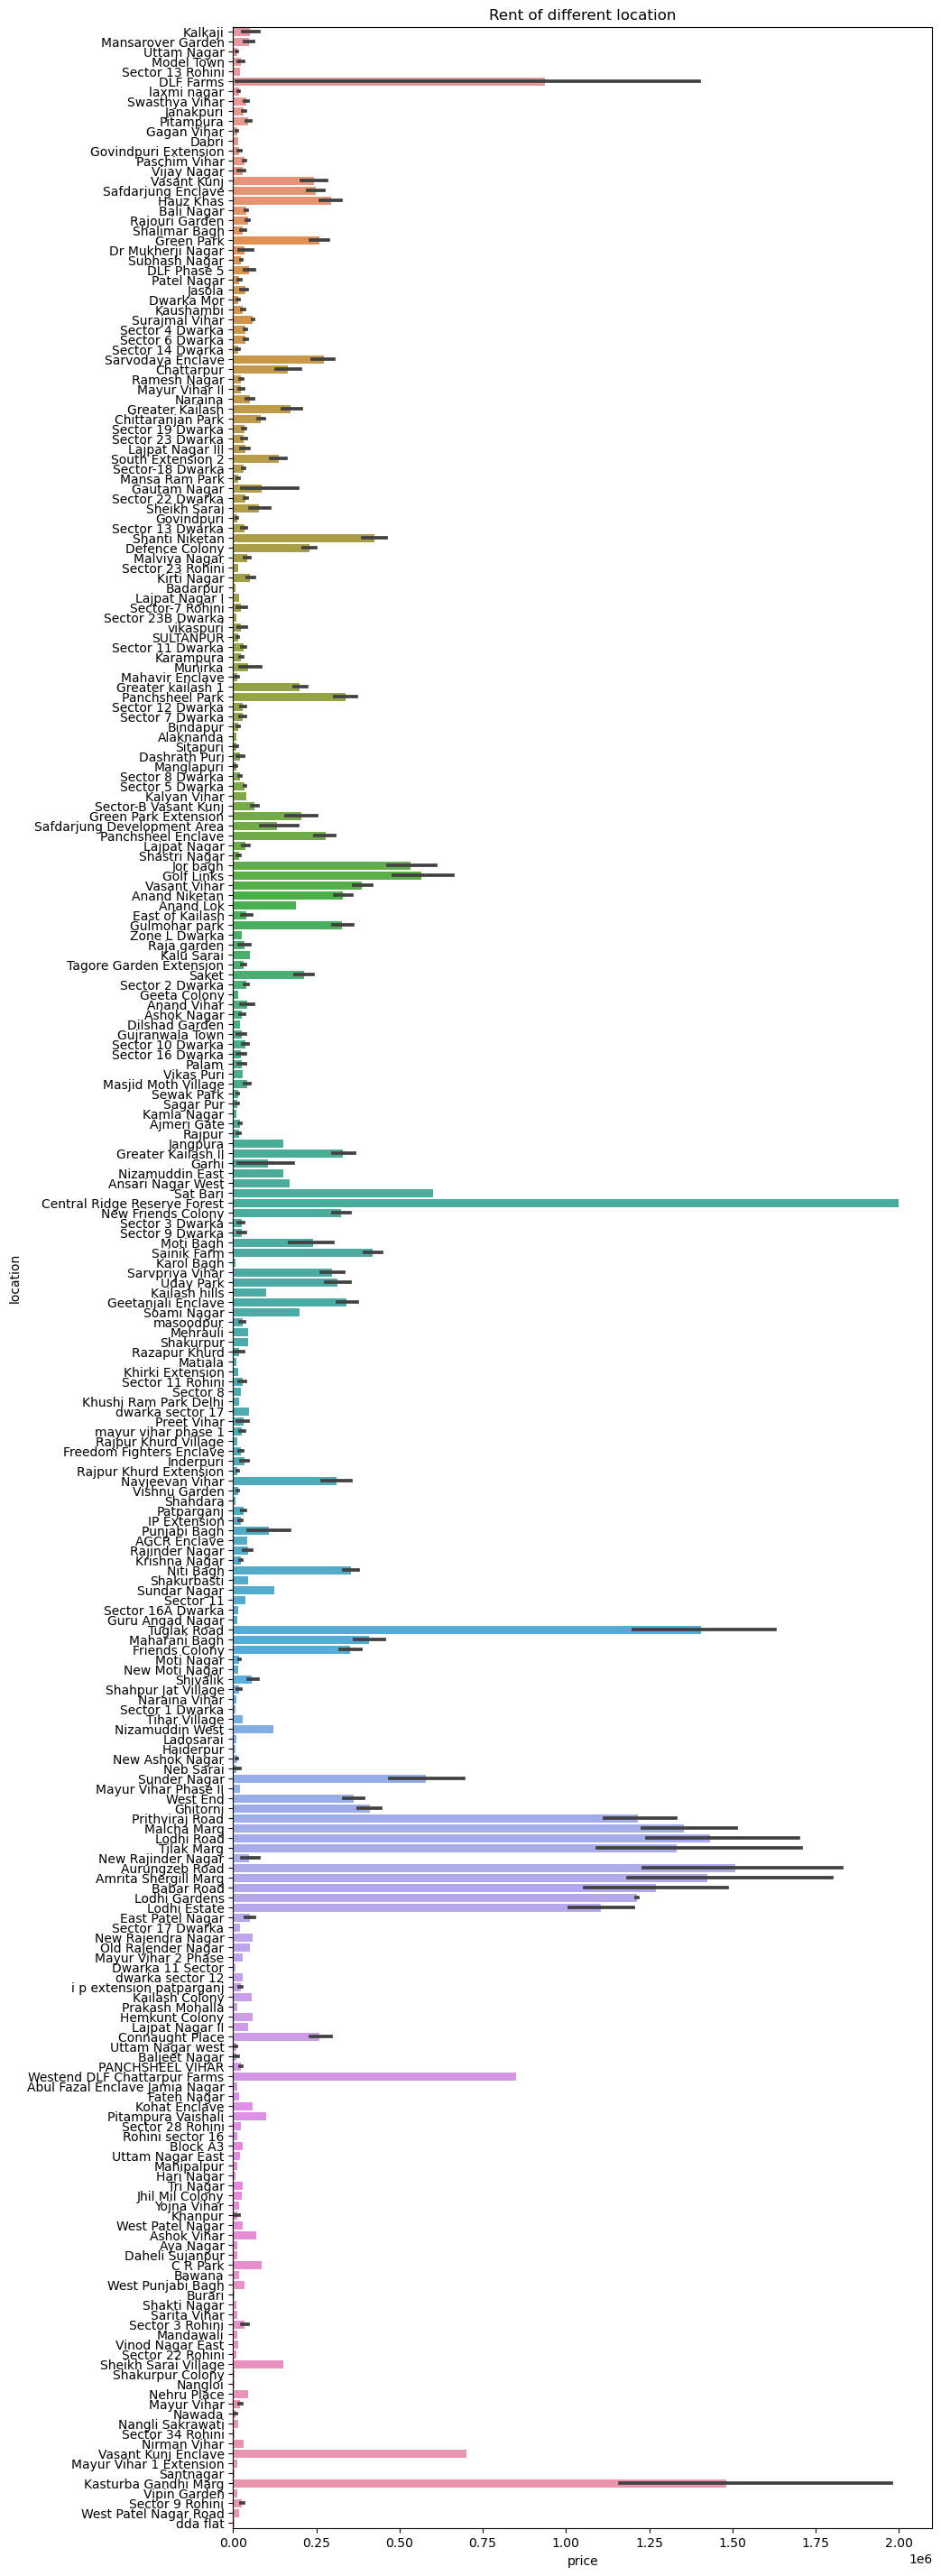

In [43]:
plt.figure(figsize=(10, 36))
sns.barplot(y=df.location,x=df.price)
plt.title('Rent of different location')

From the above plot, we can see that ,Central ridge reserve forest is the most expensive area, areas like Karol bagh , Santngar,Sector 34 rohini ,Burari etc are comparatively cheaper.

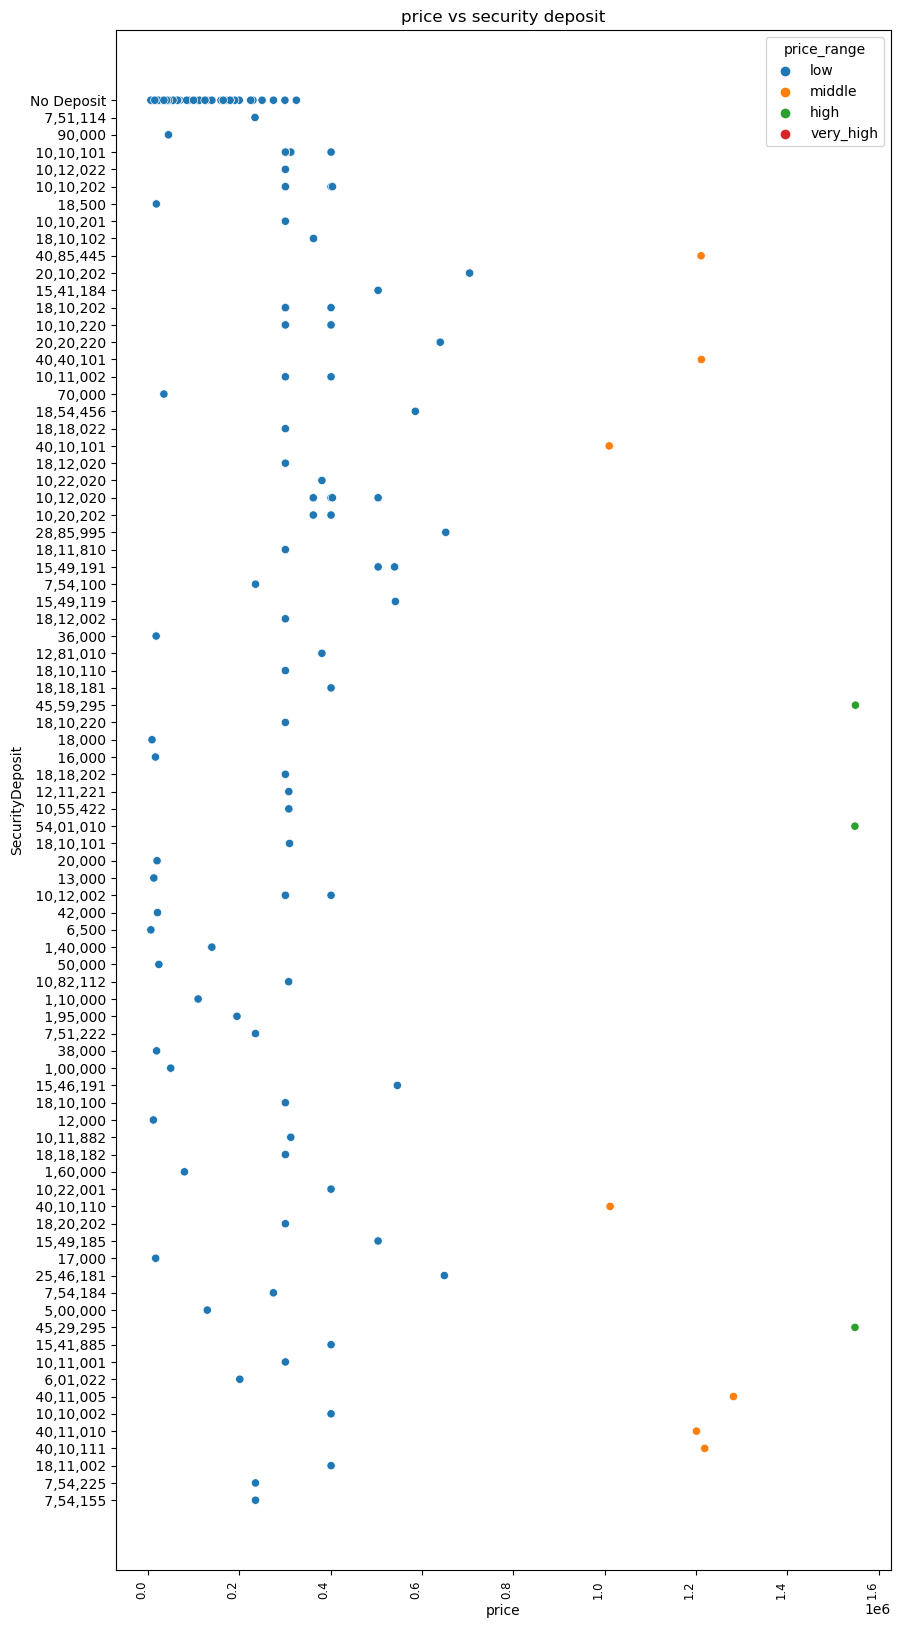

In [44]:
plt.figure(figsize=(10, 20))
k=sns.scatterplot(x=df.price,y=df.SecurityDeposit[0:11501010:20],hue=df.price_range)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='small')
plt.title('price vs security deposit')
plt.show()

From the scatterplot, we can infer that mostly, no deposit is asked as security for cheaper houses ,if asked amount will be proportional to the rent 

Text(0.5, 1.0, 'house_type counts')

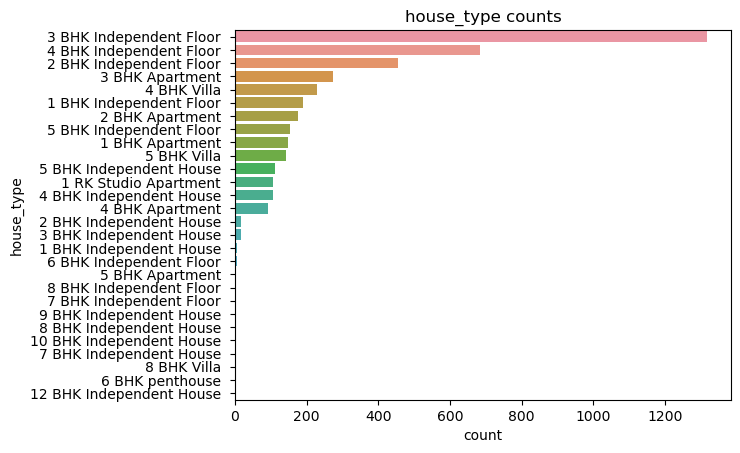

In [45]:
# Assuming 'df' is your DataFrame containing the 'house_type' variable
# Count occurrences of each house type
house_type_counts = df['house_type'].value_counts()

# Convert the counts to a DataFrame
house_type_counts_df = house_type_counts.reset_index()
house_type_counts_df.columns = ['house_type', 'count']

# Now, plot the count of each house type
sns.barplot(data=house_type_counts_df, x='count', y='house_type')
plt.title('house_type counts')

The most commonly listed properties are 3,4,2 bhk independent floor.This shows that while seeking luxury, people are concerned about there privacy also .(Considering listings are make according to people's preference)

Text(0.5, 1.0, 'Bathroom count')

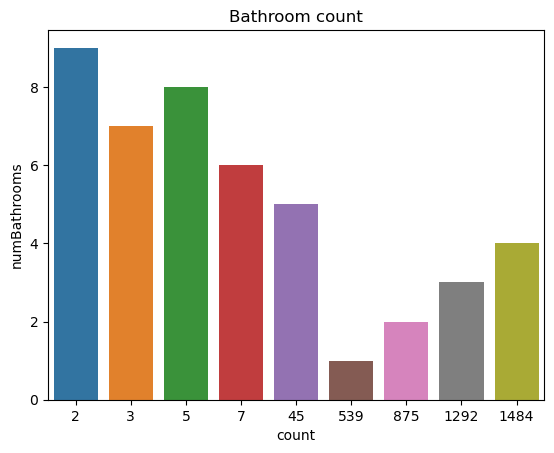

In [46]:
bathroom_counts = df['numBathrooms'].value_counts()

# Convert the counts to a DataFrame
bathroom_counts_df = bathroom_counts.reset_index()
bathroom_counts_df.columns = ['numBathrooms', 'count']


sns.barplot(data=bathroom_counts_df, x='count', y='numBathrooms')
plt.title('Bathroom count')

Most houses have 4 or 3 bathrooms.(infered from the plot).Even though there are large houses, there won't be those much bathrooms. Very small number of houses have more than 4 bathrooms.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   house_type        4252 non-null   object  
 1   house_size        4252 non-null   object  
 2   location          4252 non-null   object  
 3   city              4252 non-null   object  
 4   latitude          4252 non-null   float64 
 5   longitude         4252 non-null   float64 
 6   price             4252 non-null   int64   
 7   currency          4252 non-null   object  
 8   numBathrooms      4252 non-null   float64 
 9   verificationDate  4252 non-null   object  
 10  description       4252 non-null   object  
 11  SecurityDeposit   4252 non-null   object  
 12  Status            4252 non-null   object  
 13  price_range       4252 non-null   category
 14  size_range        4252 non-null   category
dtypes: category(2), float64(3), int64(1), object(9)
memory usage: 602.8+ KB


In [48]:
le=LabelEncoder()
df['house_type']=le.fit_transform(df['house_type'])
df['house_size']=le.fit_transform(df['house_size'])
df['location']=le.fit_transform(df['location'])
df['city']=le.fit_transform(df['city'])
df['verificationDate']=le.fit_transform(df['verificationDate'])
df['description']=le.fit_transform(df['description'])
df['SecurityDeposit']=le.fit_transform(df['SecurityDeposit'])
df['Status']=le.fit_transform(df['Status'])


In [49]:
# Define mapping
mapping = {'low': 0, 'middle': 1, 'high': 2,'very_high':3}

# Apply mapping using astype
df['price_range'] = df['price_range'].astype(str).map(mapping)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   house_type        4252 non-null   int32   
 1   house_size        4252 non-null   int32   
 2   location          4252 non-null   int32   
 3   city              4252 non-null   int32   
 4   latitude          4252 non-null   float64 
 5   longitude         4252 non-null   float64 
 6   price             4252 non-null   int64   
 7   currency          4252 non-null   object  
 8   numBathrooms      4252 non-null   float64 
 9   verificationDate  4252 non-null   int32   
 10  description       4252 non-null   int32   
 11  SecurityDeposit   4252 non-null   int32   
 12  Status            4252 non-null   int32   
 13  price_range       4133 non-null   float64 
 14  size_range        4252 non-null   category
dtypes: category(1), float64(4), int32(8), int64(1), object(1)
memory usage: 498.8

In [53]:
# Define mapping
mapping = {'small': 0, 'medium': 1, 'large': 2,'very_large':3}

# Apply mapping using astype
df['size_range'] = df['size_range'].astype(str).map(mapping)

In [55]:
df.drop(['currency'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        4252 non-null   int32  
 1   house_size        4252 non-null   int32  
 2   location          4252 non-null   int32  
 3   city              4252 non-null   int32  
 4   latitude          4252 non-null   float64
 5   longitude         4252 non-null   float64
 6   price             4252 non-null   int64  
 7   numBathrooms      4252 non-null   float64
 8   verificationDate  4252 non-null   int32  
 9   description       4252 non-null   int32  
 10  SecurityDeposit   4252 non-null   int32  
 11  Status            4252 non-null   int32  
 12  price_range       4133 non-null   float64
 13  size_range        4252 non-null   int64  
dtypes: float64(4), int32(8), int64(2)
memory usage: 494.4 KB


<Axes: >

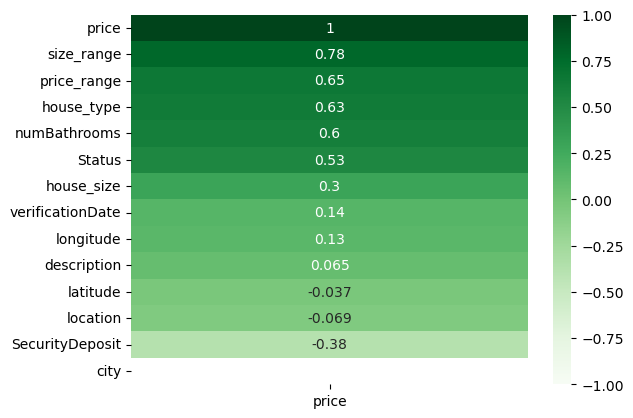

In [57]:
sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')

In [63]:
df.corr()[["price"]].sort_values(by="price", ascending=False)

,price
price,1.000000
size_range,0.775605
price_range,0.650063
house_type,0.630020
numBathrooms,0.599427
Status,0.533012
house_size,0.298098
verificationDate,0.141350
longitude,0.130483
description,0.065413


As price_range is derived out of price, we are dropping that.

In [113]:
x=df[['house_type','numBathrooms','Status','house_size','verificationDate','size_range']].values
y=df[['price']].values


In [114]:
#scaling the data set

sc=StandardScaler()
x= sc.fit_transform(x)

#split into train and test set

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

### Crossvalidation:

In [115]:
models = { 
    "LinearRegression": LinearRegression(), 
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(), 
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "RandomForestRegressor":RandomForestRegressor() 
}


In [116]:

for name, model in models.items(): 
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1) 
    print("cross validation model : {}".format(name)) 
    rmse = np.sqrt(-scores) 
    rmse_average = np.mean(rmse) 
    print("AVERAGE RMSE: ",rmse_average) 
    print("*"*100)


cross validation model : LinearRegression
AVERAGE RMSE:  99434.59719014697
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  99432.91352709696
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  99434.58310640334
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  302982.8648932299
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  80614.50146319033
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  72942.962347233
**************************************************************

#### RMSE value is less for GradientBoostingRegressor, so we are selecting this model.

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
model=GradientBoostingRegressor()

In [119]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [120]:
training_score = model.score(x_train, y_train)*100
training_score

94.01121387817099

In [121]:
testing_score = model.score(x_test, y_test)*100
testing_score

92.10302931047653

In [122]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

92.10302931047653

In [123]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

42731.910134861595

In [124]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

5861524060.059356

In [125]:
y_pred = model.predict(x)

In [126]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,22000.0,1.993873e+04
1,20000.0,2.034811e+04
2,8500.0,1.825991e+04
3,48000.0,3.468014e+04
4,20000.0,2.687323e+04
...,...,...
4247,1022001.0,1.199949e+06
4248,1549181.0,1.644257e+06
4249,301012.0,2.683704e+05
4250,301011.0,3.305592e+05


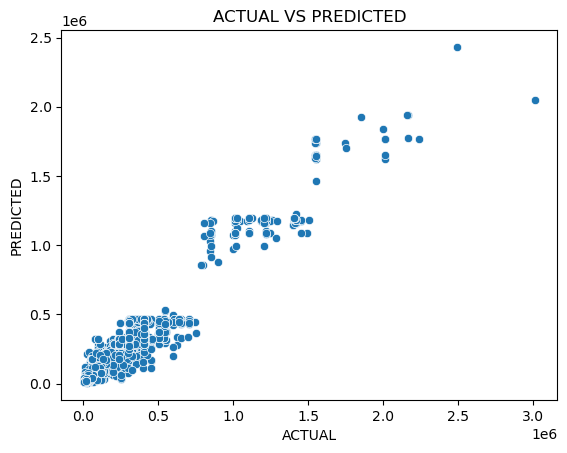

In [127]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.title('ACTUAL VS PREDICTED')
plt.show()

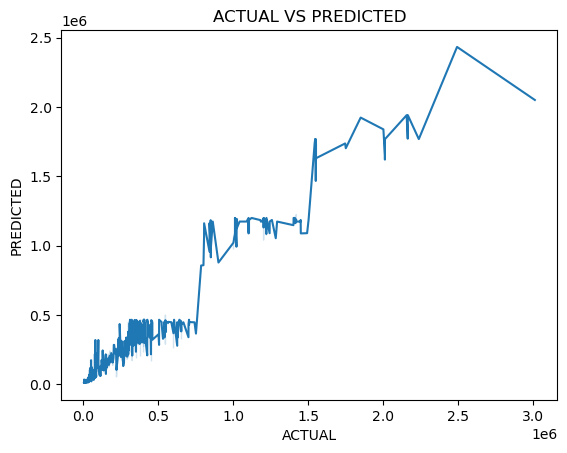

In [128]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.title('ACTUAL VS PREDICTED')
plt.show()

### Conclusion

#### In this analysis,GradientBoostingRegressor, we did extensive analysis of input data and were able to achieve Test Accuracy of 92.10 %